# Maven Olympic Challenge

## 120 Years of Olympic History

### Historical dataset on the modern Olympic Games, from Athens 1896 to Rio 2016. Each row corresponds to an individual athlete competing in an individual event, and includes information about the athlete (ID, sex, name, age, height, weight, country) and the event (games, year, city, sport, event, medal)



## Recommended Analysis

1. Analyze and visualize the % of athletes who were female over time.

2. Compare and contrast the summer and the winter games...

    How many athletes compete?

    How many countries compete?

    How many events are there?

3. Analyze and visualize country-level trends...

    Which countries send the most athletes to the olympics?

    Do they also tend to win the most medals?

    How have these trends changed over time?
    

### 0. Importing and cleaning data

In [2]:
#Libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import squarify
from scipy import stats
#from fuzzywuzzy import fuzz

In [3]:
#importing data
dataframe = pd.read_csv('athlete_events.csv', sep = ',')

In [4]:
#Basic information from dataset 
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [5]:
dataframe.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [6]:
#Remove duplicates 
dataframe = dataframe[~dataframe.duplicated()]

#Remove Na's

dataframe = dataframe.dropna(how = 'all')
dataframe


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [7]:
# Analyzing data from country definitions

country = pd.read_csv('country_definitions.csv')
print(country.head())


   NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN


In [8]:
# Merging data from country definitions 

df = dataframe.merge(country, on = 'NOC')
df.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,602,Abudoureheman,M,22.0,182.0,75.0,China,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,NaN
3,1463,Ai Linuer,M,25.0,160.0,62.0,China,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,NaN
4,1464,Ai Yanhan,F,14.0,168.0,54.0,China,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,NaN


In [9]:
# Removing unecessary columns

df = df.drop(['Team','notes'], axis = 1)
df.head()

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,2,A Lamusi,M,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,602,Abudoureheman,M,22.0,182.0,75.0,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China
3,1463,Ai Linuer,M,25.0,160.0,62.0,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China
4,1464,Ai Yanhan,F,14.0,168.0,54.0,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China


In [10]:
# Renaming region to country
df = df.rename({'region':'Country'},axis = 1)

### 1. Analyze and visualize the % of athletes who were female over time.


In [11]:
# Function for dummy variable 

def dummy (field , dataset):

    dummyz = pd.get_dummies(dataset[field])

    x = pd.concat([dataset.drop(field, axis = 1), dummyz], axis = 1)

    return x 

In [12]:
# Creating dummy variable for sex

df1 = dummy('Sex', df)
df1

,ID,Name,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,F,M
0,1,A Dijiang,24.0,180.0,80.0,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,0,1
1,2,A Lamusi,23.0,170.0,60.0,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,0,1
2,602,Abudoureheman,22.0,182.0,75.0,CHN,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Middleweight,NaN,China,0,1
3,1463,Ai Linuer,25.0,160.0,62.0,CHN,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Lightweight, Greco-Roman",NaN,China,0,1
4,1464,Ai Yanhan,14.0,168.0,54.0,CHN,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Women's 200 metres Freestyle,NaN,China,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269377,120575,Mamorallo Tjoka,23.0,150.0,56.0,LES,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Marathon,NaN,Lesotho,1,0
269378,120575,Mamorallo Tjoka,27.0,150.0,56.0,LES,2012 Summer,2012,Summer,London,Athletics,Athletics Women's Marathon,NaN,Lesotho,1,0
269379,122166,M'apotlaki Ts'elho,15.0,NaN,NaN,LES,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Women's 4 x 100 metres Relay,NaN,Lesotho,1,0
269380,122215,Lefa Tsapi,23.0,170.0,63.0,LES,1984 Summer,1984,Summer,Los Angeles,Boxing,Boxing Men's Welterweight,NaN,Lesotho,0,1


In [13]:
# Function for grouping (just for personal development this function is not used later)
def grouping (dataset, colgroup ,columns , filter, filterexpr, colnames, aggfunc = ['sum','count'] ):     if filter != None: 
        dataset = dataset[dataset[filter] == filterexpr]
    if colgroup != None:
        aggfunc_use = {colgroup:aggfunc}
        x = dataset.groupby(columns).agg(aggfunc_use)
    else: 
        x = dataset.groupby(columns).agg(aggfunc)
    x.columns = colnames 
    return x 

# Function for calculation percentage
def pct (fieldcalc, fieldtotal,dataset):
    x = round(dataset[fieldcalc] / dataset[fieldtotal]*100,2)
    return x



In [14]:
# Grouping total participants according to gender
m_f  = grouping(df,'Sex','Sex',filter = None, filterexpr= None, colnames=['X', 'Total_Participants'])
m_f = m_f.drop(['X'],axis = 1) 
m_f 

,Total_Participants
Sex,
F,74249
M,195133


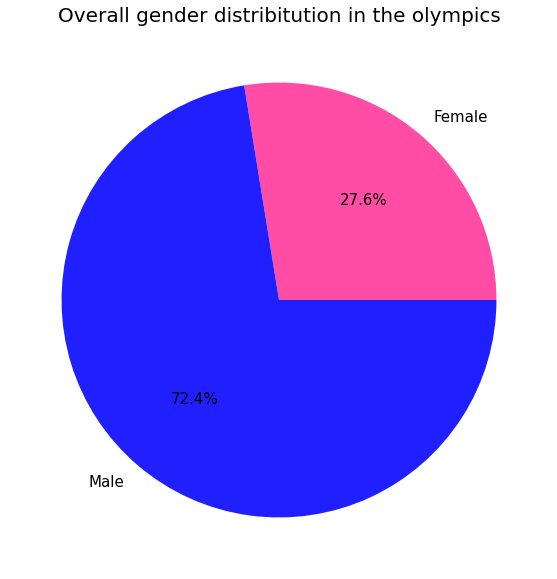

In [15]:
# Plotting pie plot
plt.figure(figsize=(15,10))
plt.pie(m_f.Total_Participants, labels = ['Female','Male'], autopct='%1.1f%%', colors =  ['#ff4da6',"#1f1fff" ] , textprops= {'fontsize' : 15})

plt.title('Overall gender distribitution in the olympics', fontsize = 20)
plt.show()

In [16]:
# Grouping participants acording to being female on a yearly basis
 
group_1 = grouping(df1,'F','Year',filter = None, filterexpr= None, colnames=['Female_Participants', 'Total_Participants'])
group_1['Female Participants pct'] = pct('Female_Participants','Total_Participants',group_1)
group_1['Male Participants pct'] = 100 - group_1['Female Participants pct']
group_1

,Female_Participants,Total_Participants,Female Participants pct,Male Participants pct
Year,,,,
1896,0.0,380,0.00,100.00
1900,33.0,1898,1.74,98.26
1904,16.0,1301,1.23,98.77
1906,11.0,1733,0.63,99.37
1908,47.0,3069,1.53,98.47
1912,87.0,4040,2.15,97.85
1920,134.0,4292,3.12,96.88
1924,251.0,5570,4.51,95.49
1928,424.0,5238,8.09,91.91


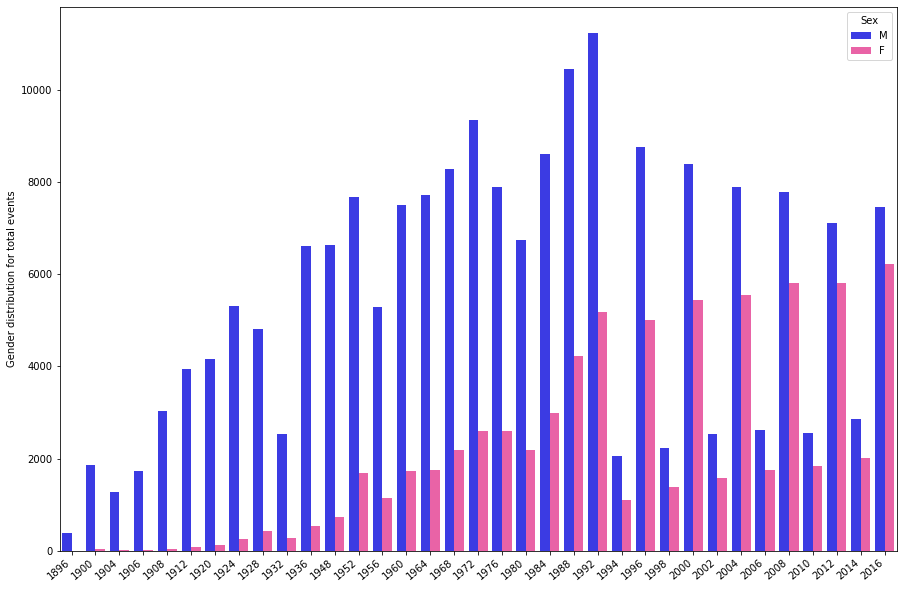

In [17]:
# Analyzing how many participants of each gender there were over the years

fig, ax = plt.subplots()
fig.set_size_inches(15,10)
hue_colors = {"M":"#1f1fff", "F":'#ff4da6'}
ax = sns.countplot(x = 'Year', data = dataframe, hue = 'Sex', palette = hue_colors )
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = 'right'  )
plt.xlabel('')
plt.ylabel('Gender distribution for total events')
plt.show()

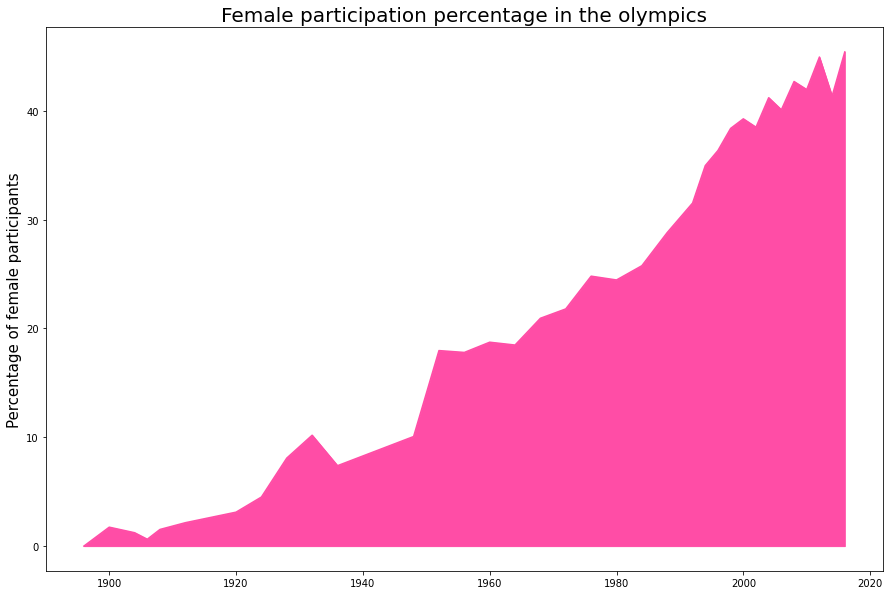

In [18]:
# Plotting Female's growing involvement in the olympics

group_1['Female Participants pct'].plot(figsize = (15,10), color =  '#ff4da6')
plt.fill_between(group_1.index,group_1['Female Participants pct'].values, color = '#ff4da6' )

plt.grid(False)
plt.xlabel('')
plt.ylabel('Percentage of female participants', fontsize = 15)
plt.title('Female participation percentage in the olympics' , fontsize = 20)
plt.show()

Beautify this plot 
Add conclusion regarding women's involvement in the olympics


### 2. Compare and contrast the summer and the winter games...

    How many athletes compete?

    How many countries compete?

    How many events are there?


In [19]:
# when did the winter games began
winter = df[df['Season']=='Winter'].sort_values('Year')
winter.head()

,ID,Name,Sex,Age,Height,Weight,NOC,Games,Year,Season,City,Sport,Event,Medal,Country
234235,35769,Miroslav Fleischmann,M,37.0,NaN,NaN,TCH,1924 Winter,1924,Winter,Chamonix,Ice Hockey,Ice Hockey Men's Ice Hockey,NaN,Czech Republic
42949,115907,Harald Aleksander Strm,M,26.0,NaN,NaN,NOR,1924 Winter,1924,Winter,Chamonix,Speed Skating,"Speed Skating Men's 5,000 metres",NaN,Norway
42948,115907,Harald Aleksander Strm,M,26.0,NaN,NaN,NOR,1924 Winter,1924,Winter,Chamonix,Speed Skating,"Speed Skating Men's 1,500 metres",NaN,Norway
40314,47618,"Sonja Henie (-Topping, -Gardiner, -Onstad)",F,11.0,155.0,45.0,NOR,1924 Winter,1924,Winter,Chamonix,Figure Skating,Figure Skating Women's Singles,NaN,Norway
156118,124642,Gaston Van Hazebroeck,M,NaN,NaN,NaN,BEL,1924 Winter,1924,Winter,Chamonix,Speed Skating,"Speed Skating Men's 5,000 metres",NaN,Belgium


In [20]:
# Creating dummy variable for Seasons
df2 = dummy('Season', df)
df2Winter = df2[df2['Winter']==1]
df2Summer = df2[df2['Summer']==1]

In [22]:
# Grouping events athletes and countries
Events_Athletes_Countries = df2.groupby(['Year','Winter','Summer']).agg({'Event':'nunique','Name':'count','Country':'nunique'}).reset_index()
Events_Athletes_Countries.columns=['Year','Winter','Summer','Events','Athletes','Country']
Events_Athletes_Countries

,Year,Winter,Summer,Events,Athletes,Country
0,1896,0,1,43,380,12
1,1900,0,1,90,1898,31
2,1904,0,1,95,1301,14
3,1906,0,1,74,1733,20
4,1908,0,1,109,3069,22
5,1912,0,1,107,4040,28
6,1920,0,1,158,4292,29
7,1924,0,1,131,5110,45
8,1924,1,0,17,460,19
9,1928,0,1,122,4656,46


In [23]:
Events_Athletes_Countries_Winter = Events_Athletes_Countries[Events_Athletes_Countries['Winter']==1]
Events_Athletes_Countries_Summer = Events_Athletes_Countries[Events_Athletes_Countries['Summer']==1]

In [24]:
print(f'Total Summer olympics where : {Events_Athletes_Countries["Summer"].sum()} \n Total Winter olympics where : {Events_Athletes_Countries["Winter"].sum()}')


Total Summer olympics where : 29 
 Total Winter olympics where : 22


In [25]:
print(f'Total participants in the Summer olympics where : {Events_Athletes_Countries_Summer["Athletes"].sum()} with an average of {round(Events_Athletes_Countries_Summer["Athletes"].mean(),0)} participants per event\nTotal participants in the Winter olympics where : {Events_Athletes_Countries_Winter["Athletes"].sum()} with an average of {round(Events_Athletes_Countries_Winter["Athletes"].mean(),0)} participants per event')

Total participants in the Summer olympics where : 220818 with an average of 7614.0 participants per event
Total participants in the Winter olympics where : 48564 with an average of 2207.0 participants per event


In [26]:
print(f'Total countries in the Summer olympics where : {df2Summer.Country.nunique()} with an average of {round(Events_Athletes_Countries_Summer["Country"].mean(),0)} countries per event\nTotal countries in the Winter olympics where : {df2Winter.Country.nunique()} with an average of {round(Events_Athletes_Countries_Winter["Country"].mean(),0)} countries per event')

Total countries in the Summer olympics where : 205 with an average of 95.0 countries per event
Total countries in the Winter olympics where : 111 with an average of 46.0 countries per event


### 3. Analyze and visualize country-level trends...

    Which countries send the most athletes to the olympics?

    Do they also tend to win the most medals?

    How have these trends changed over time?

In [27]:
# Checking the countries with the most participants overall 
Athletes_Country = df2.groupby(['Country']).agg({'Name':'count'})
Athletes_Country.columns = ['Total Athletes']
Athletes_Country.sort_values('Total Athletes', ascending = False, inplace=True)

Athletes_CountryTop = Athletes_Country.head(20)
Athletes_CountryTop

,Total Athletes
Country,
USA,18604
Germany,15787
France,12551
UK,12115
Russia,11692
Italy,10668
Canada,9681
Japan,8424
Sweden,8291


In [28]:
# Adding colors 
colors =['#d3d1c1', '#2595a2', '#fcd327','#ffad49', '#082fea', '#1b9000','#18496e','#2eb8a7','#dfb574', '#006c85','#06304b']

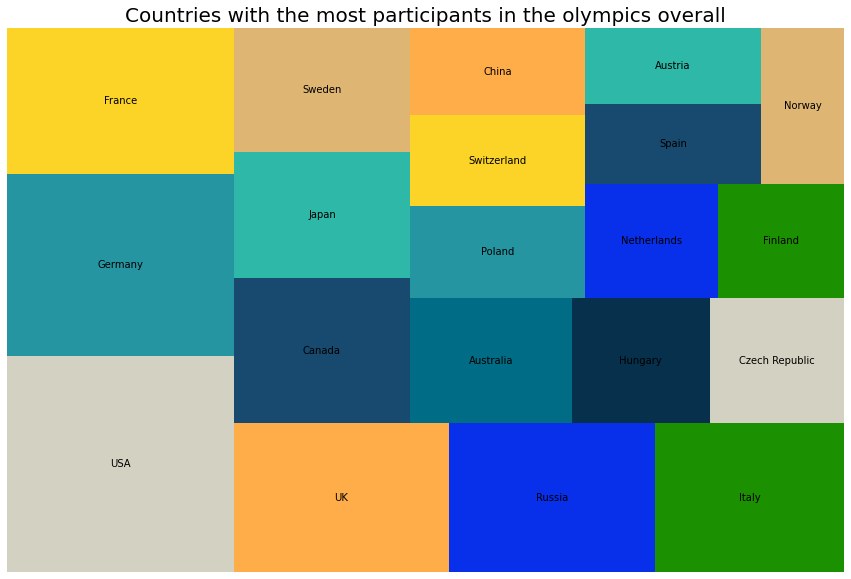

In [29]:
# Plotting a treemap of the countries with the most athletes 
plt.figure(figsize=(15,10))
squarify.plot(sizes = Athletes_CountryTop['Total Athletes'], label = Athletes_CountryTop.index, color=colors)
plt.title('Countries with the most participants in the olympics overall', fontsize = 20)
plt.axis('off')
plt.show()

In [30]:
# Grouping medals and athletes per country 

Top_Countries_Medals =  df2.groupby(['Country']).agg({'Name':'count', 'Medal':'count'})
Top_Countries_Medals.columns = ['Total Athletes', 'Total Medals']
Top_Countries_Medals.sort_values('Total Athletes', ascending = False, inplace=True)
Top_Countries_Medals = Top_Countries_Medals.reset_index()
datatop = Top_Countries_Medals.head(10)
Top_Countries_Medals

,Country,Total Athletes,Total Medals
0,USA,18604,5637
1,Germany,15787,3756
2,France,12551,1767
3,UK,12115,2067
4,Russia,11692,3947
...,...,...,...
200,Kiribati,11,0
201,Brunei,10,0
202,Timor-Leste,9,0
203,Kosovo,8,1


In [31]:
# Change country name to other if Country not in top 10 
Top_Countries_Medals['Country'] = [c if c in list(datatop['Country']) else 'Other' for c in list(Top_Countries_Medals['Country']) ]
Top_Countries_Medals

,Country,Total Athletes,Total Medals
0,USA,18604,5637
1,Germany,15787,3756
2,France,12551,1767
3,UK,12115,2067
4,Russia,11692,3947
...,...,...,...
200,Other,11,0
201,Other,10,0
202,Other,9,0
203,Other,8,1


In [32]:
# function for drawing a linear regression 
def lin(x):
    return slope * x + intercept

# Calculating linear regression for Athletes and medals
slope, intercept, r, p, std_err = stats.linregress(Top_Countries_Medals['Total Medals'],Top_Countries_Medals['Total Athletes'])
linearreg = list(map(lin,Top_Countries_Medals['Total Athletes']))


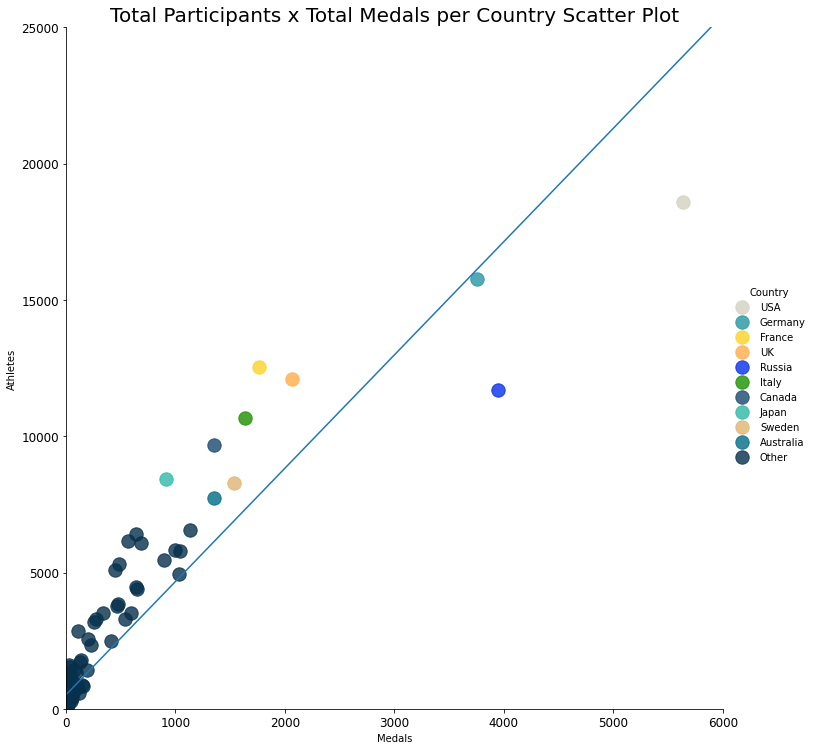

In [33]:
# Removing gridline
plt.rcParams["axes.grid"] = False

# Attributing colors to countries
cmap = dict(zip(Top_Countries_Medals.Country,colors))
co = Top_Countries_Medals.Country.map(cmap)

# Plotting scatter plot
sns.lmplot(x ='Total Medals', y = 'Total Athletes', data=Top_Countries_Medals, hue='Country' , fit_reg = False, height = 10 , palette = co ,scatter_kws={'s': 180}  )

# Configuring scatter plot
plt.gca().set(xlim=(0, 6000), ylim=(0, 25000),xlabel='Medals', ylabel='Athletes')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Total Participants x Total Medals per Country Scatter Plot', fontsize = 20)

# Add Regression line
plt.plot(Top_Countries_Medals['Total Athletes'],linearreg)

plt.show()

In [34]:
# Creating dataframe for a stacked bar chart of the medals

# Dummy variable
df3 = dummy('Medal', df2)

#Fields and functions for grouping
fields = ['Name','Bronze','Silver','Gold']
funcs = list(['count']+['sum']*3)
aggfunc = {k:v  for k,v in zip(fields,funcs)}

# Grouping the dataset with the desired variables 
df3_grouped = df3.groupby('Country').agg(aggfunc).sort_values(by = 'Name', ascending = False).head(20).drop('Name', axis = 1)
df3_grouped.reset_index()
df3_grouped


,Bronze,Silver,Gold
Country,,,
USA,1358.0,1641.0,2638.0
Germany,1260.0,1195.0,1301.0
France,666.0,602.0,499.0
UK,651.0,739.0,677.0
Russia,1178.0,1170.0,1599.0
Italy,531.0,531.0,575.0
Canada,451.0,438.0,463.0
Japan,357.0,309.0,247.0
Sweden,535.0,522.0,479.0


Calculate participation  / Medal Ratio 

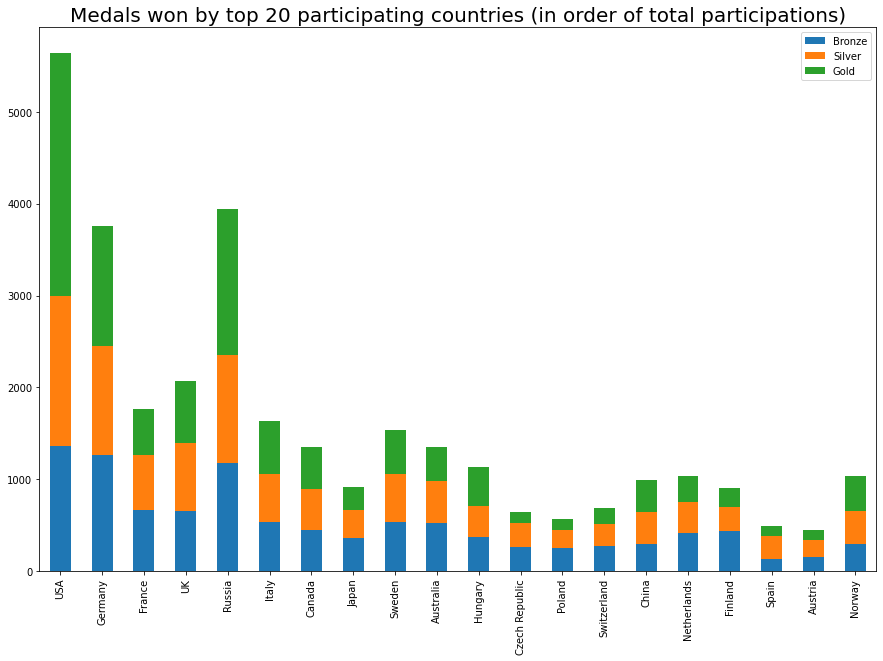

In [35]:
# Plotting medals stacked barchart 
plt.rcParams["figure.figsize"] = (15,10)


plot = df3_grouped.plot(kind = 'bar', stacked = True)
plt.xlabel(None)
plt.title('Medals won by top 20 participating countries (in order of total participations)', fontsize = 20)
plt.show()

In [36]:
#Calculating percentage overall average participation/medal per year
# Participation  

df4_grouped = df3.groupby(['Year','Country']).agg(aggfunc).sort_values(by = 'Year', ascending = False)

In [37]:
df4_grouped['% Medals/Participation'] = round(((df4_grouped['Silver']+df4_grouped['Bronze']+df4_grouped['Gold'])/ df4_grouped['Name'])*100,2)
df4_grouped = df4_grouped.reset_index()

In [38]:
dff = df4_grouped.groupby('Year').agg({'% Medals/Participation':'mean'})

In [39]:
dff

,% Medals/Participation
Year,
1896,37.681667
1900,37.818387
1904,42.272143
1906,26.082500
1908,18.679545
1912,15.828929
1920,18.377931
1924,13.381739
1928,14.106087


In [40]:
df5 = df4_grouped.loc[df4_grouped['% Medals/Participation']>0,['Year','Country','Name','% Medals/Participation']].sort_values(by = 'Year', ascending = True)

In [45]:
Sports = df.groupby(['Year','Season']).Sport.agg('nunique').reset_index()


In [46]:
Sports

,Year,Season,Sport
0,1896,Summer,9
1,1900,Summer,20
2,1904,Summer,18
3,1906,Summer,13
4,1908,Summer,24
5,1912,Summer,17
6,1920,Summer,25
7,1924,Summer,20
8,1924,Winter,10
9,1928,Summer,17


Text(0.5, 1.0, 'Number of Sports per Season')

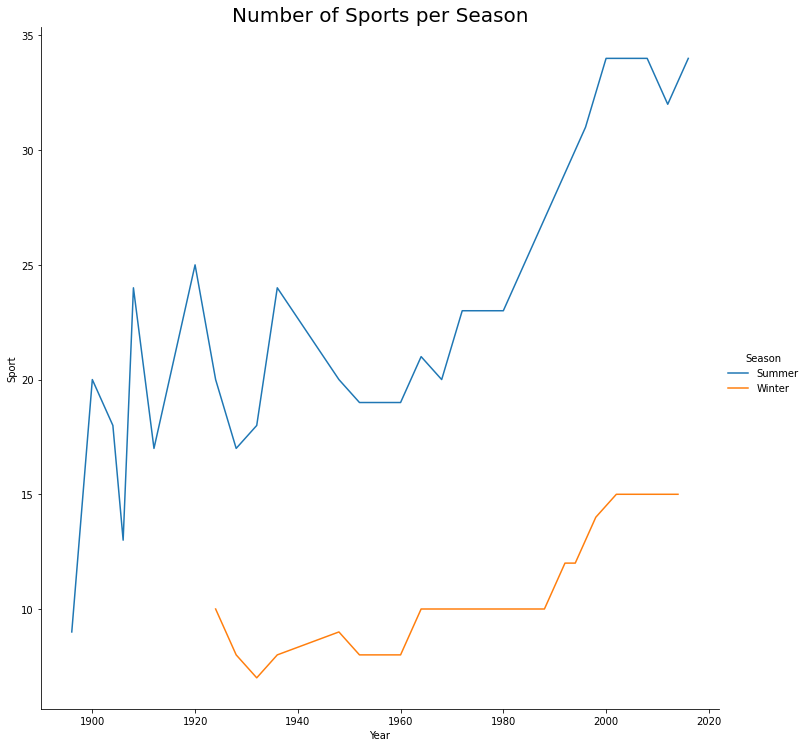

In [47]:
# Plotting number of sports per Season over the years
sns.relplot(x = 'Year', y = 'Sport', data = Sports , style = 'Season', hue = 'Season', kind = 'line', height= 10, dashes = False)
plt.title('Number of Sports per Season', fontsize = 20)

[Text(0.5, 1.0, 'Weight distribution')]

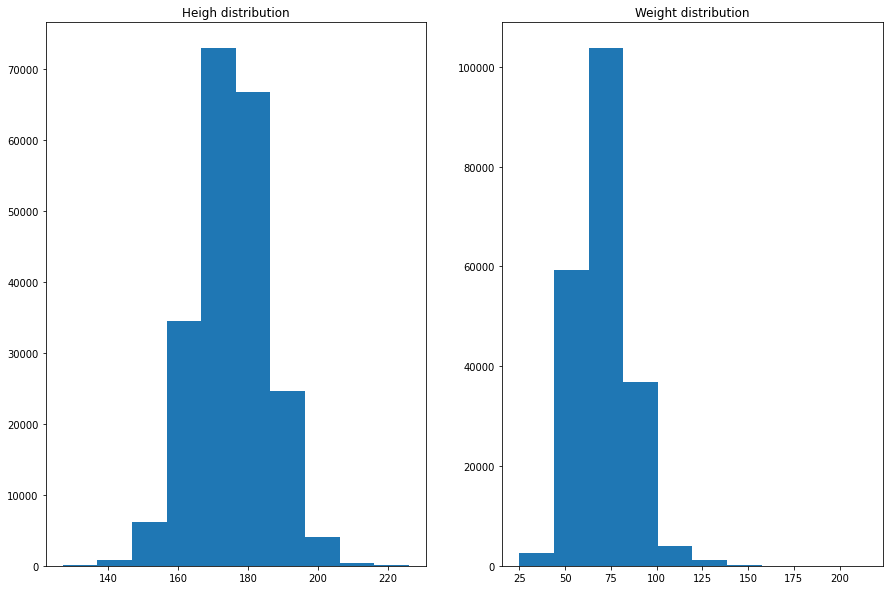

In [88]:
#height and weight distribution 

fig,ax = plt.subplots(1,2)

height = df['Height']
weight = df['Weight']

ax[0].hist(height.dropna())
ax[0].set(title='Heigh distribution')

a[1]xhist(weight.dropna(), label = 'Weight')
ax[1].set(title = 'Weight distribution') 


In [72]:
# Does height/weight of the athlete influence wins over all sports what are the sports that this is most notorious

#  Height medals vs height non medals 
# Filtering medals
Medals = df.loc[df['Medal'] != 'NaN', ['Year','Sport','Height']].dropna()
Medals_1 = pd.DataFrame(Medals.groupby('Sport').Height.agg('mean'))

# Filtering nonmedals
NonMedals = df.loc[df['Medal'].isnull(), ['Year','Sport','Height']]
NonMedals_1 = pd.DataFrame(NonMedals.groupby('Sport').Height.agg('mean'))

In [81]:
# Mergin medal height and non medal heigth 

X = Medals_1.merge(NonMedals_1, on = 'Sport')
X.columns = ['Average Medal Height', 'Average non-medal Height']

In [90]:
# Computing difference between medalist height and non-medal height

X['Difference'] = X['Average Medal Height']-X['Average non-medal Height']
X = X.dropna()
X = X.sort_values(by = 'Difference', ascending = False)
X

,Average Medal Height,Average non-medal Height,Difference
Sport,,,
Softball,169.395089,168.412639,0.982450
Rhythmic Gymnastics,167.870253,167.153386,0.716867
Taekwondo,176.750836,176.178414,0.572422
Rugby Sevens,175.363636,174.955157,0.408479
Basketball,190.896231,190.503860,0.392372
Swimming,178.591091,178.228266,0.362824
Boxing,172.829146,172.530437,0.298709
Golf,174.290076,173.991736,0.298341
Nordic Combined,176.504464,176.206186,0.298279


The height difference between medalists and non medalists is not that much notorious.

In [94]:
# Same analysis with bmi

# Create a function for bmi
def bmi(x,y):
    z = y/(x/100)**2
    return z



In [107]:
# Calculating bmi 
dfbmi = df.copy()
dfbmi['bmi'] = bmi(dfbmi['Height'],dfbmi['Weight'])

# Bmi medal grouping
bmi_Medals = dfbmi.loc[df['Medal'] != 'NaN', ['Year','Sport','bmi']]
bmi_Medals_1 = pd.DataFrame(bmi_Medals.groupby('Sport').bmi.agg('mean'))

# Bmi non medal grouping
bmi_NonMedals = dfbmi.loc[df['Medal'].isnull(), ['Year','Sport','bmi']]
bmi_NonMedals_1 = pd.DataFrame(bmi_NonMedals.groupby('Sport').bmi.agg('mean'))

# Grouping bmi dataframes
Y = bmi_Medals_1.merge(bmi_NonMedals_1, on = 'Sport')

In [115]:
# Visualizing the bmi matrix
Y = Y.dropna()
Y['Difference'] = Y['bmi_x']-Y['bmi_y']
Y.sort_values(by = 'Difference', ascending = False)

,bmi_x,bmi_y,Difference
Sport,,,
Softball,23.454672,23.228180,0.226491
Curling,23.633659,23.441996,0.191663
Rugby Sevens,25.456048,25.318888,0.137160
Weightlifting,27.732287,27.599889,0.132398
Volleyball,22.460733,22.362893,0.097840
Judo,25.583083,25.495544,0.087539
Cycling,22.523837,22.456981,0.066856
Golf,23.395998,23.335633,0.060365
Boxing,21.676824,21.622921,0.053902


In [150]:
# Most medals per athlete

# Creating dummy variable for Medal
Medalist = dummy('Medal',df)
Medalist = Medalist.dropna()

# Grouping medals quantity per athlete
Most_Medals = Medalist.groupby(['Name','Sex','Sport','Country']).agg({'Bronze':'sum','Gold':'sum','Silver':'sum','Event':'count', 'Year':'nunique'})

# Summing medals ammount 
Most_Medals['Total_Medals'] = Most_Medals.Bronze+Most_Medals.Gold+Most_Medals.Silver

# Sorting values from top to bottom
Most_Medals = Most_Medals.sort_values(by = 'Total_Medals', ascending = False).head(20)




In [141]:
# Analysis of the goats
Most_Medals

,,,,Bronze,Gold,Silver,Event,Year,Total
Name,Sex,Sport,Country,,,,,,
"Michael Fred Phelps, II",M,Swimming,USA,2,23,3,30,5,28
Larysa Semenivna Latynina (Diriy-),F,Gymnastics,Russia,4,9,5,19,3,18
Nikolay Yefimovich Andrianov,M,Gymnastics,Russia,3,7,5,24,3,15
Borys Anfiyanovych Shakhlin,M,Gymnastics,Russia,2,7,4,24,3,13
Ole Einar Bjrndalen,M,Biathlon,Norway,1,8,4,26,6,13
Takashi Ono,M,Gymnastics,Japan,4,5,4,32,4,13
"Dara Grace Torres (-Hoffman, -Minas)",F,Swimming,USA,4,4,4,13,5,12
Sawao Kato,M,Gymnastics,Japan,1,8,3,24,3,12
Birgit Fischer-Schmidt,F,Canoeing,Germany,0,8,4,13,6,12
